Energies for the bound states are: 
-1.45
Energies from the analyitical model are: 
Symmetrical case)
(Antisymmetrical case)


<ipython-input-39-3e3780f304bc>:89: RuntimeWarning: invalid value encountered in sqrt
  z = sqrt(2*en)
<ipython-input-39-3e3780f304bc>:90: RuntimeWarning: invalid value encountered in sqrt
  z0 = sqrt(2*Vo)
<ipython-input-39-3e3780f304bc>:93: RuntimeWarning: divide by zero encountered in true_divide
  f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case
<ipython-input-39-3e3780f304bc>:190: RuntimeWarning: invalid value encountered in sqrt
  plot(x1, np.sqrt(q/a - x**2), label='$\sqrt{z_0^2 - z^2}$')


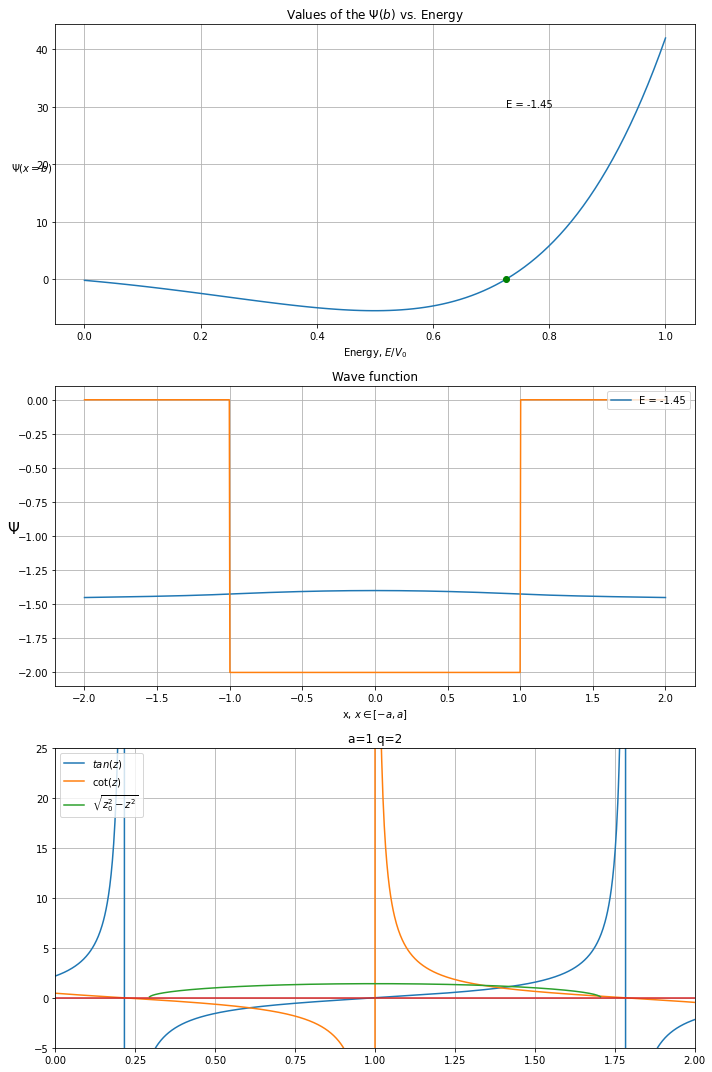

In [39]:
from scipy.integrate import odeint
from scipy.optimize import brentq
import seaborn as sns

 
def V(x):
    """
    Potential function in the finite square well. Width is L and value is global variable Vo
    """
    L = 1
    if abs(x) > L:
        return 0
    else:
        return Vo

def SE(psi, x):
    """
    Returns derivatives for the 1D schrodinger eq.
    Requires global value E to be set somewhere. State0 is first derivative of the
    wave function psi, and state1 is its second derivative.
    """
    state0 = psi[1]
    state1 = 2.0*(V(x) - E)*psi[0]
    return array([state0, state1])
 
def Wave_function(energy):
    """
    Calculates wave function psi for the given value
    of energy E and returns value at point b
    """
    global psi
    global E
    E = energy
    psi = odeint(SE, psi0, x)
    return psi[-1,0]
 
def find_all_zeroes(x,y):
    """
    Gives all zeroes in y = Psi(x)
    """
    all_zeroes = []
    s = sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes
 
def find_analytic_energies(en):
    """
    Calculates Energy values for the finite square well using analytical
    model (Griffiths, Introduction to Quantum Mechanics, 1st edition, page 62.)
    """
    z = sqrt(2*en)
    z0 = sqrt(2*Vo)
    z_zeroes = []
    f_sym = lambda z: tan(z)-sqrt((z0/z)**2-1)      # Formula 2.138, symmetrical case
    f_asym = lambda z: -1/tan(z)-sqrt((z0/z)**2-1)  # Formula 2.138, antisymmetrical case
 
    # first find the zeroes for the symmetrical case
    s = sign(f_sym(z))
    for i in range(len(s)-1):   # find zeroes of this crazy function
        if s[i]+s[i+1] == 0:
            zero = brentq(f_sym, z[i], z[i+1])
            z_zeroes.append(zero)
    print("Energies from the analyitical model are: ")
    print("Symmetrical case)")
    for i in range(0, len(z_zeroes),2):   # discard z=(2n-1)pi/2 solutions cause that's where tan(z) is discontinous
        print("%.4f" %(z_zeroes[i]**2/2))
    # Now for the asymmetrical
    z_zeroes = []
    s = sign(f_asym(z))
    for i in range(len(s)-1):   # find zeroes of this crazy function
        if s[i]+s[i+1] == 0:
            zero = brentq(f_asym, z[i], z[i+1])
            z_zeroes.append(zero)
    print("(Antisymmetrical case)")
    for i in range(0, len(z_zeroes),2):   # discard z=npi solutions cause that's where ctg(z) is discontinous
        print("%.4f" %(z_zeroes[i]**2/2))

        
def well(x, a, q, N):
    """
    Potential function in the finite square well. Width is L and value is global variable Vo
    """
    x = linspace(-a*2, a*2, N)
    return np.piecewise(x, [x < -a, ((x >= -a) & (x < a)), x >= a], [0, q, 0])

N = 1000
psi = np.zeros([N,2])  
psi0 = array([0,1])  
q = 2
Vo = -1 * q #-5
E = 0.0 
b = 1   
a = b
x = linspace(-b*2, b*2, N)    # x-axis
 
def main():   
 
    en = linspace(0, Vo, 100) 
 
    psi_b = []  
    for e1 in en:
        psi_b.append(Wave_function(e1))   
    E_zeroes = find_all_zeroes(en, psi_b)

    print("Energies for the bound states are: ")
    for E in E_zeroes:
        print("%.2f" %E)
    find_analytic_energies(en)   
 

    plt.rcParams['figure.figsize'] = [10, 15]
    plt.subplot(3, 1, 1)
    plot(en/Vo, psi_b)
    title('Values of the $\Psi(b)$ vs. Energy')
    xlabel('Energy, $E/V_0$')
    ylabel('$\Psi(x = b)$', rotation='horizontal')
    for E in E_zeroes:
        plot(E/Vo, [0], 'go')
        annotate("E = %.2f"%E, xy = (E/Vo, 0), xytext=(E/Vo, 30))
    grid()

    plt.subplot(3, 1, 2)
    for E in E_zeroes[0:4]:
        t = Wave_function(E)
        plot(x, psi[:,0]/ np.linalg.norm(psi[:,0]) + E, label="E = %.2f"%E)

        
    plot(x, well(x, b, Vo, N))
    legend(loc="upper right")
    title('Wave function')
    xlabel('x, $x \in [-a, a]$')
    ylabel('$\Psi$', rotation='horizontal', fontsize = 15)
    grid()
    
    plt.subplot(3, 1, 3)
    x_lim = 2
    x1 = np.linspace(0, 2, 1000)
    plot(x1, np.tan(x), label='$tan(z)$')
    plot(x1, 1/np.tan(x), label='$\cot(z)$')
    plot(x1, np.sqrt(q/a - x**2), label='$\sqrt{z_0^2 - z^2}$')
    plot(x1, np.zeros(len(x)))
    ylim(-5, 25)
    xlim(0, x_lim)
    title(f"a={b} q={q}")
    legend(loc="upper left")
    grid()

    plt.tight_layout()
    plt.savefig(f"figs/fig_{a}_{q}.png")